# Фотометрическое определение титана

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, tstd
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
import seaborn as sns

In [76]:
float_formatter = "{:.2f}".format
def f_lin(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B
def f_1(Y, A, B):
    '''
    Y = AX + B
    Thus
    X = ( Y - B ) / A
    '''
    return (Y - B) / A

## Измерения

In [3]:
df = pd.read_csv('all-calibration-rel-to-water.csv',
                 delimiter=';', decimal=',',
                 engine='python', encoding="latin-1",
                 skiprows=[0,1], nrows=250)
df_ex = pd.read_csv('ex2.csv',
                           delimiter=';', decimal=',',
                           engine='python', encoding="latin-1",
                           skiprows=[0,1], nrows=150)
del df['Unnamed: 14']
del df_ex['Unnamed: 4']

In [4]:
col_names = []
exer_names = []
for i in range(1, 8):
    col_names.append( f'{i}-wl' )
    col_names.append( f'{i}-abs' )
for i in range(1, 3):
    exer_names.append( f'{i}-wl-ex' )
    exer_names.append( f'{i}-abs-ex' )

In [5]:
df.columns = col_names
df_ex.columns = exer_names

### Построение

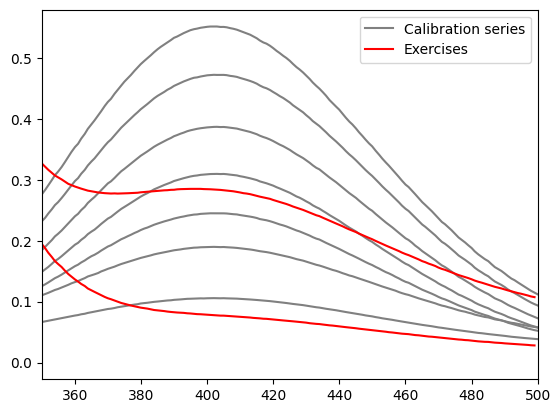

In [12]:
added_labels = set()

# Plot calibration series
for i in range(len(col_names) // 2):
    label = 'Calibration series'
    if label not in added_labels:
        plt.plot(df[col_names[i * 2]], df[col_names[i * 2 + 1]], color='gray', label=label)
        added_labels.add(label)
    else:
        plt.plot(df[col_names[i * 2]], df[col_names[i * 2 + 1]], color='gray')

# Plot exercises
for i in range(len(exer_names) // 2):
    label = 'Exercises'
    if label not in added_labels:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red', label=label)
        added_labels.add(label)
    else:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red')

plt.legend()
plt.xlim(350, 500)
plt.savefig('titanium.svg')

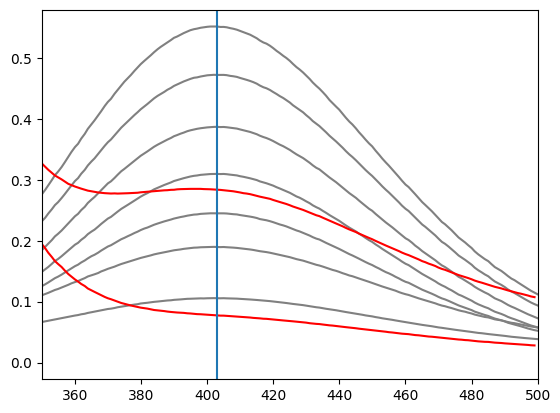

In [50]:
# Interpolate and plot interpolation
f = [1 for i in range(1, len(col_names))]
for i in range(len(col_names) // 2):
    f[i * 2] = interp1d(df[col_names[i * 2]], df[col_names[i * 2 + 1]])
for i in range(len(col_names) // 2):
    plt.plot(df[col_names[i * 2]], f[i * 2](df[col_names[i * 2]]), color='gray')

f_ex = [1 for i in range(1, len(exer_names))]
for i in range(len(exer_names) // 2):
    f_ex[i * 2] = interp1d(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]])
for i in range(len(exer_names) // 2):
    plt.plot(df_ex[exer_names[i * 2]], f_ex[i * 2](df_ex[exer_names[i * 2]]), color='red')
scan_wl = 403 # nm
plt.xlim(350, 500)
plt.axvline(scan_wl, label='Comparison wavelength')

## Неважная часть

NameError: name 'names' is not defined

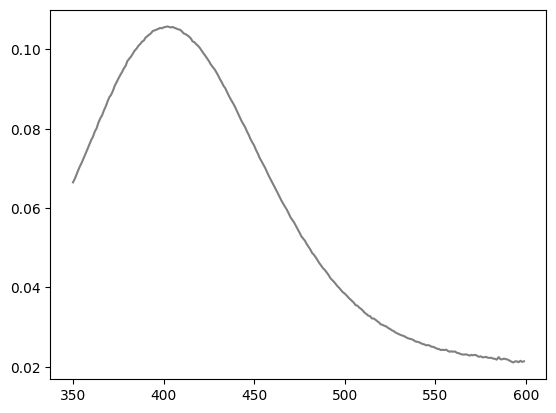

In [10]:
'''
added_labels = set()

# Plot calibration series
for i in range(len(col_names) // 2):
    label = 'Calibration series'
    
    # Plot the data
    if label not in added_labels:
        plt.plot(df[col_names[i * 2]], df[col_names[i * 2 + 1]], color='gray', label=label)
        added_labels.add(label)
    else:
        plt.plot(df[col_names[i * 2]], df[col_names[i * 2 + 1]], color='gray')

    # Find peaks
    peaks, _ = find_peaks(df[names[i * 2 + 1]])
    
    # Annotate peaks
    plt.scatter(df[col_names[i * 2]].iloc[peaks], df[col_names[i * 2 + 1]].iloc[peaks], color='blue', marker='o')

# Plot exercises
for i in range(len(exer_names) // 2):
    label = 'Exercises'
 
    if label not in added_labels:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red', label=label)
        added_labels.add(label)
    else:
        plt.plot(df_ex[exer_names[i * 2]], df_ex[exer_names[i * 2 + 1]], color='red')

    peaks, _ = find_peaks(df_ex[exer_names[i * 2 + 1]])
    
    plt.scatter(df_ex[exer_names[i * 2]].iloc[peaks], df_ex[exer_names[i * 2 + 1]].iloc[peaks], color='orange', marker='o')

plt.legend()
plt.savefig('titanium.svg')
plt.xlim(350, 500)
mplcursors.cursor()
'''

## Нахождение оптической плотности на выбранной длине волны

In [61]:
A_cal = []
for i in range(len(col_names) // 2):
    A_cal.append(f[i * 2](scan_wl))
A_cal = np.array(A_cal)

A_ex = []
for i in range(len(exer_names) // 2):
    A_ex.append(f_ex[i* 2](scan_wl))
A_ex = np.array(A_ex)

## Анализ данных

In [89]:
# выбранная lambda = nm
V_cal = np.array([1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00])
c_std = 0.500
V_flask = 100
c_cal = V_cal * c_std / V_flask

array([0.79767899, 4.32932682])

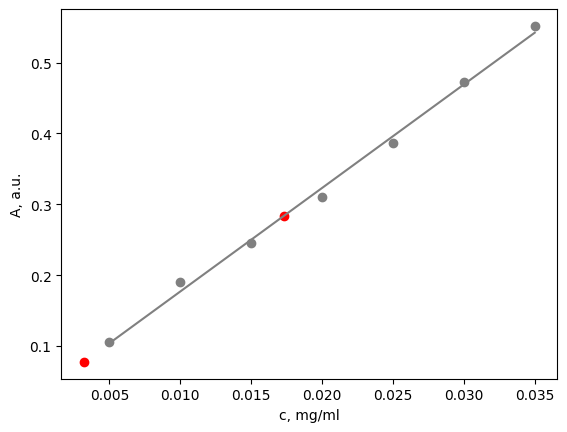

In [94]:
plt.scatter(c_cal, A_cal, color='gray')
params = linregress(c_cal, A_cal)
c_fine = np.linspace(min(c_cal), max(c_cal), 100)
plt.plot(c_fine, f_lin(c_fine, params[0], params[1]), color='gray')
c_ex = f_1(A_ex, params[0], params[1])
plt.scatter(c_ex, A_ex, color='red')
plt.xlabel('c, mg/ml')
plt.ylabel('A, a.u.')
m_ti = c_ex * 250
m_ti

Очевидно, левую точку необходимо выбросить (почему-то комплекс там не образовался).
Для непротиворечивой точки получилось $4.33 mg$.

In [102]:
sample_mass = np.array([0.25595 - 0.14350, 0.25570 - 0.14359]) * 1000

percent = m_ti / sample_mass * 100
print(sample_mass, '\n', percent)

[112.45 112.11] 
 [0.70936327 3.86167765]


In [83]:
sd = 0
for i in range(len(A_cal)):
    sd += ( A_cal[i] - f_lin(c_cal[i], params[0], params[1]) ) ** 2
sd = sd ** 0.5
print('Standart deviation is', sd)

Standart deviation is 0.023434999388343907
